<a href="https://colab.research.google.com/github/vandant1/For-colab2/blob/main/Emotion_Identifyv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Upload both datasets manually
uploaded = files.upload()


Saving emotions.csv to emotions.csv


In [2]:
import os
import shutil

# Define dataset directory
dataset_dir = "/content/dataset"
os.makedirs(dataset_dir, exist_ok=True)

# Move the uploaded file to the dataset directory
dataset_filename = list(uploaded.keys())[0]  # Get uploaded filename dynamically
dataset_path = os.path.join(dataset_dir, dataset_filename)
shutil.move(dataset_filename, dataset_path)

print(f"✅ Dataset moved to: {dataset_path}")


✅ Dataset moved to: /content/dataset/emotions.csv


In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv(dataset_path, delimiter="\t", header=None, names=["Text", "Label"])

# Display first few rows
print("📌 First 10 Rows:")
df.head(10)


📌 First 10 Rows:


,Text,Label
0,"text,label",NaN
1,"i just feel really helpless and heavy hearted,4",NaN
2,ive enjoyed being able to slouch about relax a...,NaN
3,i gave up my internship with the dmrg and am f...,NaN
4,"i dont know i feel so lost,0",NaN
5,i am a kindergarten teacher and i am thoroughl...,NaN
6,"i was beginning to feel quite disheartened,0",NaN
7,i would think that whomever would be lucky eno...,NaN
8,i fear that they won t ever feel that deliciou...,NaN
9,im forever taking some time out to have a lie ...,NaN


In [4]:
# Check dataset information
print("\n📊 Dataset Info:")
df.info()

# Check for missing values
print("\n❓ Missing Values:")
print(df.isnull().sum())



📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416810 entries, 0 to 416809
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Text    416810 non-null  object 
 1   Label   0 non-null       float64
dtypes: float64(1), object(1)
memory usage: 6.4+ MB

❓ Missing Values:
Text          0
Label    416810
dtype: int64


<ipython-input-6-701998a09fec>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Label"], palette="Set2", legend=False)
<ipython-input-6-701998a09fec>:6: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.countplot(x=df["Label"], palette="Set2", legend=False)


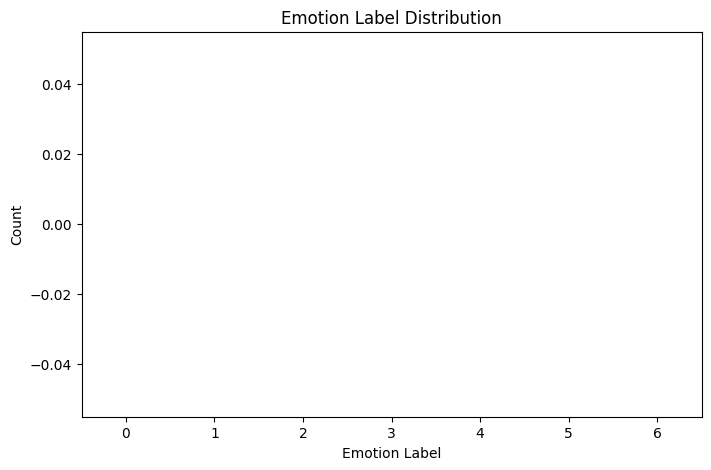

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count label occurrences
plt.figure(figsize=(8,5))
sns.countplot(x=df["Label"], palette="Set2", legend=False)

plt.title("Emotion Label Distribution")
plt.xlabel("Emotion Label")
plt.ylabel("Count")
plt.show()


In [7]:
# Define emotion mapping based on dataset understanding
emotion_map = {
    0: "Sadness",
    1: "Happiness",
    2: "Love",
    3: "Anger",
    4: "Fear",
    5: "Excitement"
}

# Apply mapping
df["Emotion"] = df["Label"].map(emotion_map)

# Display dataset with emotion names
print("📌 First 10 Rows with Mapped Emotions:")
df.head(10)


📌 First 10 Rows with Mapped Emotions:


,Text,Label,Emotion
0,"text,label",NaN,NaN
1,"i just feel really helpless and heavy hearted,4",NaN,NaN
2,ive enjoyed being able to slouch about relax a...,NaN,NaN
3,i gave up my internship with the dmrg and am f...,NaN,NaN
4,"i dont know i feel so lost,0",NaN,NaN
5,i am a kindergarten teacher and i am thoroughl...,NaN,NaN
6,"i was beginning to feel quite disheartened,0",NaN,NaN
7,i would think that whomever would be lucky eno...,NaN,NaN
8,i fear that they won t ever feel that deliciou...,NaN,NaN
9,im forever taking some time out to have a lie ...,NaN,NaN


In [8]:
import re

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters & punctuation
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply text cleaning
df["Cleaned_Text"] = df["Text"].apply(clean_text)

# Display sample cleaned text
print("\n📌 Sample Cleaned Text:")
df[["Text", "Cleaned_Text"]].head(10)



📌 Sample Cleaned Text:


,Text,Cleaned_Text
0,"text,label",textlabel
1,"i just feel really helpless and heavy hearted,4",i just feel really helpless and heavy hearted
2,ive enjoyed being able to slouch about relax a...,ive enjoyed being able to slouch about relax a...
3,i gave up my internship with the dmrg and am f...,i gave up my internship with the dmrg and am f...
4,"i dont know i feel so lost,0",i dont know i feel so lost
5,i am a kindergarten teacher and i am thoroughl...,i am a kindergarten teacher and i am thoroughl...
6,"i was beginning to feel quite disheartened,0",i was beginning to feel quite disheartened
7,i would think that whomever would be lucky eno...,i would think that whomever would be lucky eno...
8,i fear that they won t ever feel that deliciou...,i fear that they won t ever feel that deliciou...
9,im forever taking some time out to have a lie ...,im forever taking some time out to have a lie ...


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_1.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download stopwords AND punkt_tab (This is the critical change)
nltk.download("punkt")
nltk.download("stopwords")
nltk.download('punkt_tab') # Download the punkt_tab resource

stop_words = set(stopwords.words("english"))

def preprocess_text(text):
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Apply preprocessing
df["Processed_Text"] = df["Cleaned_Text"].apply(preprocess_text)

# Show processed text
print("\n📌 Sample Processed Text:")
df[["Cleaned_Text", "Processed_Text"]].head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



📌 Sample Processed Text:


,Cleaned_Text,Processed_Text
0,textlabel,textlabel
1,i just feel really helpless and heavy hearted,feel really helpless heavy hearted
2,ive enjoyed being able to slouch about relax a...,ive enjoyed able slouch relax unwind frankly n...
3,i gave up my internship with the dmrg and am f...,gave internship dmrg feeling distraught
4,i dont know i feel so lost,dont know feel lost
5,i am a kindergarten teacher and i am thoroughl...,kindergarten teacher thoroughly weary job take...
6,i was beginning to feel quite disheartened,beginning feel quite disheartened
7,i would think that whomever would be lucky eno...,would think whomever would lucky enough stay s...
8,i fear that they won t ever feel that deliciou...,fear ever feel delicious excitement christmas ...
9,im forever taking some time out to have a lie ...,im forever taking time lie feel weird


In [13]:
import pandas as pd
from io import StringIO

# Read file again, ignoring incorrect headers
df = pd.read_csv("/content/dataset/emotions.csv", header=None, names=["Text", "Label"])

# Display first few rows
df.head()


<ipython-input-13-04f53b8f351d>:5: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/dataset/emotions.csv", header=None, names=["Text", "Label"])


,Text,Label
0,text,label
1,i just feel really helpless and heavy hearted,4
2,ive enjoyed being able to slouch about relax a...,0
3,i gave up my internship with the dmrg and am f...,4
4,i dont know i feel so lost,0


In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download("punkt")
nltk.download("stopwords")

stop_words = set(stopwords.words("english"))

# Text Cleaning Function
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Stopword Removal
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Apply functions
df["Cleaned_Text"] = df["Text"].apply(clean_text)
df["Processed_Text"] = df["Cleaned_Text"].apply(preprocess_text)

# Display sample output
df.head(10)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,Label,Cleaned_Text,Processed_Text
0,text,label,text,text
1,i just feel really helpless and heavy hearted,4,i just feel really helpless and heavy hearted,feel really helpless heavy hearted
2,ive enjoyed being able to slouch about relax a...,0,ive enjoyed being able to slouch about relax a...,ive enjoyed able slouch relax unwind frankly n...
3,i gave up my internship with the dmrg and am f...,4,i gave up my internship with the dmrg and am f...,gave internship dmrg feeling distraught
4,i dont know i feel so lost,0,i dont know i feel so lost,dont know feel lost
5,i am a kindergarten teacher and i am thoroughl...,4,i am a kindergarten teacher and i am thoroughl...,kindergarten teacher thoroughly weary job take...
6,i was beginning to feel quite disheartened,0,i was beginning to feel quite disheartened,beginning feel quite disheartened
7,i would think that whomever would be lucky eno...,2,i would think that whomever would be lucky eno...,would think whomever would lucky enough stay s...
8,i fear that they won t ever feel that deliciou...,1,i fear that they won t ever feel that deliciou...,fear ever feel delicious excitement christmas ...
9,im forever taking some time out to have a lie ...,5,im forever taking some time out to have a lie ...,im forever taking time lie feel weird


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 most frequent words

# Fit and transform the processed text
X = vectorizer.fit_transform(df["Processed_Text"])

# Convert labels to numerical format
y = df["Label"].values  # Target variable

# Check shape of transformed data
X.shape, y.shape


((416810, 5000), (416810,))

In [16]:
from sklearn.model_selection import train_test_split

# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check sizes
X_train.shape, X_test.shape


((333448, 5000), (83362, 5000))

In [19]:
print(df.head())  # Check the first few rows
print(df.columns)  # Check column names


                                                Text  Label  \
0                                               text  label   
1      i just feel really helpless and heavy hearted      4   
2  ive enjoyed being able to slouch about relax a...      0   
3  i gave up my internship with the dmrg and am f...      4   
4                         i dont know i feel so lost      0   

                                        Cleaned_Text  \
0                                               text   
1      i just feel really helpless and heavy hearted   
2  ive enjoyed being able to slouch about relax a...   
3  i gave up my internship with the dmrg and am f...   
4                         i dont know i feel so lost   

                                      Processed_Text  
0                                               text  
1                 feel really helpless heavy hearted  
2  ive enjoyed able slouch relax unwind frankly n...  
3            gave internship dmrg feeling distraught  
4        

In [20]:
# Drop the first row if it contains incorrect headers
df = df.iloc[1:].reset_index(drop=True)

# Convert 'Label' column to integers
df["Label"] = df["Label"].astype(int)

# Verify unique labels
print("Unique labels:", df["Label"].unique())


Unique labels: [4 0 2 1 5 3]


In [21]:
from sklearn.model_selection import train_test_split

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(df["Processed_Text"], df["Label"], test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")


Training samples: 333447, Testing samples: 83362


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Limit vocabulary to 5000 words

# Fit and transform text data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("TF-IDF transformation completed!")


TF-IDF transformation completed!


In [23]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

print("Model training completed successfully! ✅")


Model training completed successfully! ✅


In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9006621722127588
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94     24201
           1       0.92      0.93      0.92     28164
           2       0.81      0.77      0.79      6929
           3       0.90      0.91      0.91     11441
           4       0.85      0.85      0.85      9594
           5       0.77      0.71      0.74      3033

    accuracy                           0.90     83362
   macro avg       0.87      0.85      0.86     83362
weighted avg       0.90      0.90      0.90     83362

Confusion Matrix:
 [[22865   302    68   536   385    45]
 [  366 26242  1108   144   145   159]
 [   79  1447  5322    46    20    15]
 [  510   211    41 10382   282    15]
 [  493   193    30   359  8126   393]
 [   59   253    15    10   552  2144]]


In [25]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_tfidf, y_train)

print("After SMOTE, class distribution:\n", dict(zip(*np.unique(y_train_bal, return_counts=True))))


KeyboardInterrupt: 

In [26]:
import joblib

# Save the model
joblib.dump(model, "emotion_detection_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [28]:
from google.colab import files

# Download model
files.download("emotion_detection_model.pkl")

# Download vectorizer (if used)
files.download("tfidf_vectorizer.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

FileNotFoundError: Cannot find file: tfidf_vectorizer.pkl